In [42]:
#import libraries
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout,Input
from tensorflow.keras.optimizers import Adam
import warnings
warnings.filterwarnings('ignore', category=UserWarning, module='keras.src.trainers.data_adapters.py_dataset_adapter')


In [6]:
#load and preprocess
# Define the paths
train_dir = "D:/skin/skin cancer ds/train"
validation_dir = "D:/skin/skin cancer ds/val"
test_dir = "D:/skin/skin cancer ds/test"

# Data augmentation and normalization for training
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Only rescaling for validation and test data
val_test_datagen = ImageDataGenerator(rescale=1.0/255.0)

# Flow from directories
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

validation_generator = val_test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)
print("Data generators are created")

Found 8639 images belonging to 2 classes.
Found 976 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Data generators are created


In [7]:
num_train_samples = len(train_generator.filenames)
# Batch size
batch_size = 32

# Steps per epoch
steps_per_epoch = num_train_samples // batch_size

In [8]:
# Building the CNN model
model = Sequential([
     Input(shape=(150, 150, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])


In [10]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Summary of the model
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 512)                 │      18,940,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,034,177 (72.61 MB)

 Trainable params: 19,034,177 (72.61 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
# Training the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=10
)


Epoch 1/10


C:\Users\K Abhinaya Vamsi\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


269/269 ━━━━━━━━━━━━━━━━━━━━ 230s 832ms/step - accuracy: 0.7538 - loss: 0.5536 - val_accuracy: 0.8635 - val_loss: 0.3518
Epoch 2/10
269/269 ━━━━━━━━━━━━━━━━━━━━ 1s 752us/step - accuracy: 0.8750 - loss: 0.3314 - val_accuracy: 1.0000 - val_loss: 0.2155
Epoch 3/10


C:\Users\K Abhinaya Vamsi\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


269/269 ━━━━━━━━━━━━━━━━━━━━ 223s 812ms/step - accuracy: 0.8619 - loss: 0.3241 - val_accuracy: 0.8792 - val_loss: 0.2828
Epoch 4/10
269/269 ━━━━━━━━━━━━━━━━━━━━ 1s 593us/step - accuracy: 0.8750 - loss: 0.2831 - val_accuracy: 0.8750 - val_loss: 0.3133
Epoch 5/10
269/269 ━━━━━━━━━━━━━━━━━━━━ 151s 554ms/step - accuracy: 0.8728 - loss: 0.2976 - val_accuracy: 0.8625 - val_loss: 0.3143
Epoch 6/10
269/269 ━━━━━━━━━━━━━━━━━━━━ 0s 460us/step - accuracy: 0.9062 - loss: 0.2489 - val_accuracy: 0.8750 - val_loss: 0.2131
Epoch 7/10
269/269 ━━━━━━━━━━━━━━━━━━━━ 158s 580ms/step - accuracy: 0.8791 - loss: 0.2928 - val_accuracy: 0.8875 - val_loss: 0.2837
Epoch 8/10
269/269 ━━━━━━━━━━━━━━━━━━━━ 1s 629us/step - accuracy: 0.8750 - loss: 0.2448 - val_accuracy: 0.9375 - val_loss: 0.2059
Epoch 9/10
269/269 ━━━━━━━━━━━━━━━━━━━━ 158s 580ms/step - accuracy: 0.8875 - loss: 0.2673 - val_accuracy: 0.8750 - val_loss: 0.3072
Epoch 10/10
269/269 ━━━━━━━━━━━━━━━━━━━━ 0s 442us/step - accuracy: 0.9062 - loss: 0.2265 - va

In [12]:
# Evaluating the model test accuracy
test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

31/31 ━━━━━━━━━━━━━━━━━━━━ 9s 291ms/step - accuracy: 0.9140 - loss: 0.2155
Test Accuracy: 90.02%


In [14]:
# Save the model
model.save('skin_cancer_classifier.keras')

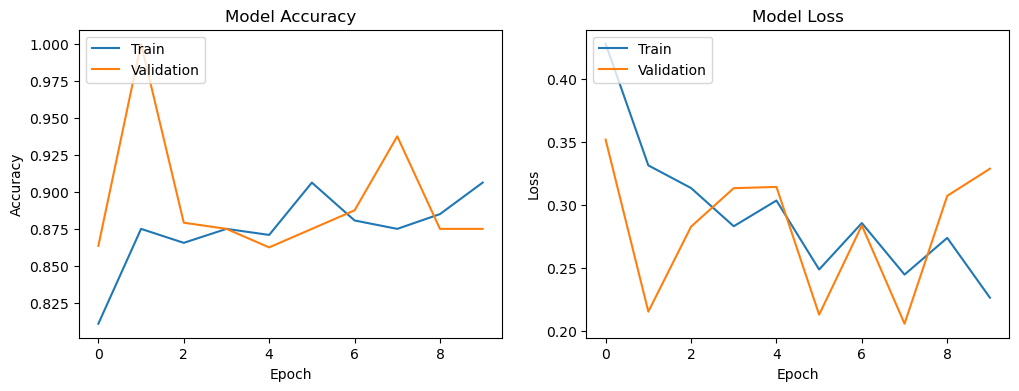

In [15]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [46]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import warnings
warnings.filterwarnings('ignore', category=UserWarning, module='keras.src.trainers.data_adapters.py_dataset_adapter')

# Load the saved model
model = load_model('skin_cancer_classifier.h5')

def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    return img_array

# Predict function
def predict_image_class(img_path):
    img_array = preprocess_image(img_path)
    prediction = model.predict(img_array)
    if prediction[0] > 0.5:
        return "Malignant"
    else:
        return "Benign"

# Example usage
img_path = r'D:\skin\skin cancer ds\test\benign\melanoma_9669.jpg'  # Replace with the path to your image
prediction = predict_image_class(img_path)
print(f"The predicted class for the image is: {prediction}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
The predicted class for the image is: Benign
